<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [2]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [3]:
# Your code here
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

Download the webpage at the url


In [4]:
#your code goes here
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

data  = requests.get(url).text

Create a soup object


In [5]:
#your code goes here
soup = BeautifulSoup(data, 'html5lib')

Scrape the `Language name` and `annual average salary`.


,Language,Salary
4,Swift,130801
0,Python,114383
5,C++,113865
3,Javascript,110981
1,Java,101013
9,Go,94082
2,R,92037
6,C#,88726
8,SQL,84793
7,PHP,84727


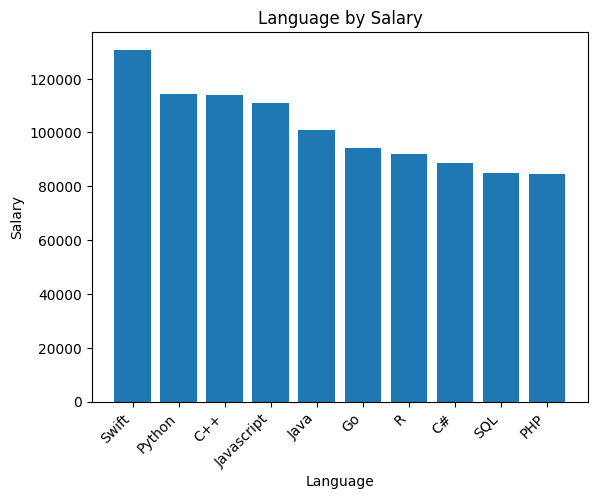

In [33]:
#your code goes here
Table = soup.find("table") 
Languages = []
Salaries = []

for row in Table.find_all("tr"):
    Row_Data = row.find_all("td")
    
    if Row_Data[0].getText() != "No.":#skips column headers       
        Languages.append(Row_Data[1].getText())

        #remove the dollar sign & comma from the salaries
        Dollars = Row_Data[3].getText()
        Value = Dollars.split("$")[1]
        Num = int(Value.split(",")[0]+Value.split(",")[1])
        Salaries.append(Num)

Df = pd.DataFrame({ "Language" : Languages, "Salary":Salaries})

Df = Df.sort_values(by="Salary", ascending=False)
display(Df)

plt.bar(Df["Language"], Df["Salary"])

plt.title('Language by Salary')
plt.xlabel('Language')
plt.ylabel('Salary')
plt.xticks(rotation=45, ha='right')

plt.show()


Save the scrapped data into a file named *popular-languages.csv*


In [24]:
# your code goes here
Df.to_csv("popular-languages.csv",index = False)

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
